In [1]:
# importing all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Correlation, regression

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
# reshaping columns
cols = list(df.columns.values)
df = df[[cols[-1]]+cols[0:20]]
df.head()

,label,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,male,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,...,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,male,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,...,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,male,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,...,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,male,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,...,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,male,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,...,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


###  Identify the target variable and do a one-hot encoding for the same

In [4]:
# Label encoding first
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df.label)

# reshaping columns
cols = list(df.columns.values)
df = df[[cols[0]] + [cols[-1]] + cols[1:21]]
df.head()

,label,label_encoded,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,male,1,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,...,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,male,1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,...,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,male,1,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,...,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,male,1,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,...,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,male,1,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,...,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [5]:
# one hot encoding on that while reshaping the 1D array
ohe = OneHotEncoder()
X = ohe.fit_transform(df.label_encoded.values.reshape(-1,1)).toarray()
X

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [6]:
# adding back to the Dataframe
dfOneHot = pd.DataFrame(X,
                       columns = ['Female','Male'])
dfOneHot.head()
df = pd.concat([df, dfOneHot], axis=1)
df.head()

,label,label_encoded,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Female,Male
0,male,1,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0,1.0
1,male,1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0,1.0
2,male,1,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0,1.0
3,male,1,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0,1.0
4,male,1,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0,1.0


In [7]:
# reshaping columns
cols = list(df.columns.values)
df = df[cols[0:2] + cols[22:24] + cols[2:22]]
df.head()

,label,label_encoded,Female,Male,meanfreq,sd,median,Q25,Q75,IQR,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,male,1,0.0,1.0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,...,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,male,1,0.0,1.0,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,...,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,male,1,0.0,1.0,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,...,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,male,1,0.0,1.0,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,...,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,male,1,0.0,1.0,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,...,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


### Split the dataset in train-test with 20% of the data kept aside for testing

In [39]:
# Splitting data
train, test = train_test_split(df, test_size=0.20)

y_train = train.label
y_test = test.label

x_train = train.iloc[:,4:25]
x_test = test.iloc[:,4:25]


### Fit a logistic regression model and measure the accuracy on the test set

In [40]:
# Training the data first
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# Predicting the data
y_predicted = model.predict(x_test)
model.predict_proba(x_test)

array([[0.6189125 , 0.3810875 ],
       [0.08484879, 0.91515121],
       [0.19912979, 0.80087021],
       ...,
       [0.24337487, 0.75662513],
       [0.89749185, 0.10250815],
       [0.24150111, 0.75849889]])

In [48]:
# Accuracy
model.score(x_test,y_test)

0.919558359621451

### Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.

In [49]:
corr = df.corr(method = 'pearson')
corr

,label_encoded,Female,Male,meanfreq,sd,median,Q25,Q75,IQR,skew,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label_encoded,1.000000,-1.000000,1.000000,-0.337415,0.479539,-0.283919,-0.511455,0.066906,0.618916,0.036627,...,-0.171775,-0.337415,-0.833921,-0.136692,-0.166461,-0.191067,-0.194974,-0.195657,-0.192213,0.030801
Female,-1.000000,1.000000,-1.000000,0.337415,-0.479539,0.283919,0.511455,-0.066906,-0.618916,-0.036627,...,0.171775,0.337415,0.833921,0.136692,0.166461,0.191067,0.194974,0.195657,0.192213,-0.030801
Male,1.000000,-1.000000,1.000000,-0.337415,0.479539,-0.283919,-0.511455,0.066906,0.618916,0.036627,...,-0.171775,-0.337415,-0.833921,-0.136692,-0.166461,-0.191067,-0.194974,-0.195657,-0.192213,0.030801
meanfreq,-0.337415,0.337415,-0.337415,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,...,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,0.479539,-0.479539,0.479539,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,...,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,-0.283919,0.283919,-0.283919,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,...,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,-0.511455,0.511455,-0.511455,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,...,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.066906,-0.066906,0.066906,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,...,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,0.618916,-0.618916,0.618916,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,...,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,0.036627,-0.036627,0.036627,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,...,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325


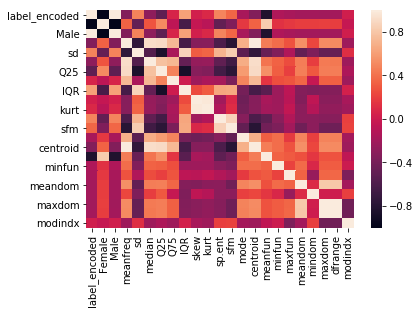

In [50]:
sns.heatmap(corr)